# Final Project – Introduction to Machine Learning (Group 32)
## Loan Approval Prediction – Binary Classification
**Tamar & Tala – Spring 2025**

This notebook walks through our end-to-end machine learning project:
- Data exploration 
- Feature processing 
- Model training 
- Evaluation 
- Final prediction submission 

## 1. Load Libraries and Data
_We’ll start by loading the data and setting up useful libraries._

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline          import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.ensemble         import RandomForestClassifier
from sklearn.model_selection   import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline     import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics      import classification_report, roc_auc_score



# Load the data
train = pd.read_csv('train.csv', na_values=["?"])
test = pd.read_csv('test.csv', na_values=["?"])
train.head()

,customer_id,Age,Employment_Type,A,Education_Level,Years_of_Education,Marital_Status,Job_Type,Household_Role,Ethnicity,...,Investment_Gain,Investment_Loss,Weekly_Work_Hours,Country_of_Residence,C,Preferred_Communication_Method,D,B,E,Loan_Approval
0,115892,90.0,NaN,77053,HS-grad,9.0,Widowed,NaN,Not-in-family,White,...,0.0,4356.0,40,United-States,104.906221,Phone_Call,2.865629,NaN,170.887465,0
1,115893,82.0,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,...,0.0,4356.0,18,United-States,96.358501,mail,5.528583,NaN,156.630201,0
2,115895,54.0,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,...,0.0,3900.0,40,United-States,115.529631,mail,3.816915,NaN,165.635557,0
3,115896,41.0,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,...,0.0,3900.0,40,United-States,85.732506,NaN,5.416363,NaN,123.379007,0
4,115897,34.0,Private,216864,HS-grad,9.0,Divorced,Other-service,Unmarried,White,...,NaN,3770.0,45,United-States,115.218443,Mail,6.453932,NaN,155.262131,0


In [164]:
# using the train test split function
y = (train['Loan_Approval'])
X = train.drop(columns=['Loan_Approval'])

X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.2, shuffle=True)

## 2. Exploratory Data Analysis (EDA)
_Let's understand the data structure, spot missing values, and explore correlations._



In [165]:
n_rows,n_columns = X_train.shape
print(f"Training set dimensions: {n_rows} rows × {n_columns} columns")

Training set dimensions: 22140 rows × 20 columns


In [166]:
X_train.describe()

,customer_id,Age,A,Years_of_Education,Investment_Gain,Investment_Loss,Weekly_Work_Hours,C,D,B,E
count,22140.000000,22037.000000,2.214000e+04,21684.000000,21480.000000,22116.000000,22140.000000,21256.000000,22140.000000,0.0,19516.000000
mean,132218.508943,38.620502,1.897733e+05,10.067008,1053.568948,85.700534,40.500407,99.933137,4.982305,NaN,139.225455
std,9385.860241,13.644967,1.049739e+05,2.581366,7257.245757,400.523834,12.352449,9.973109,1.510376,NaN,13.770922
min,115892.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,58.136513,-1.711896,NaN,82.675954
25%,124068.750000,28.000000,1.176830e+05,9.000000,0.000000,0.000000,40.000000,93.197922,3.966705,NaN,129.705568
50%,132273.500000,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000,99.924856,4.990908,NaN,139.083265
75%,140330.250000,48.000000,2.372398e+05,12.000000,0.000000,0.000000,45.000000,106.660368,5.995161,NaN,148.527468
max,148452.000000,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000,144.309842,10.876204,NaN,199.134411


In [154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22140 entries, 336 to 8261
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22140 non-null  int64  
 1   Age                             22037 non-null  float64
 2   Employment_Type                 20715 non-null  object 
 3   A                               22140 non-null  int64  
 4   Education_Level                 22140 non-null  object 
 5   Years_of_Education              21684 non-null  float64
 6   Marital_Status                  22140 non-null  object 
 7   Job_Type                        19437 non-null  object 
 8   Household_Role                  22140 non-null  object 
 9   Ethnicity                       19885 non-null  object 
 10  Gender                          22140 non-null  object 
 11  Investment_Gain                 21480 non-null  float64
 12  Investment_Loss                 2211

Column B is completely empty (100% missing), so we will remove it from the dataset.
Several columns, such as Employment_Type, Job_Type and Ethnicity have a high percentage of missing values.
We'll need to decide whether to fill them or drop them.

_Visualizing the variables to check their distributions:_

In [ ]:
# Histograms and count plots of each explanatory variable
for col in X_train.columns:
    plt.figure(figsize=(15, 4))
    
    # For numeric variables
    if pd.api.types.is_numeric_dtype(train[col]):
        sns.histplot(train[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
    
    # For categorical variables 
    else:
        sns.countplot(x=col, data=train, order=train[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col}")
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Bar plots of approval rates for categorical variables

categorical_vars = [
    'Employment_Type', 'Education_Level', 'Marital_Status', 'Job_Type',
    'Household_Role', 'Ethnicity', 'Gender', 'Country_of_Residence',
    'Preferred_Communication_Method'
]

for col in categorical_vars:
    plt.figure(figsize=(15, 4))
    sns.barplot(x=col, y='Loan_Approval', data=train, estimator='mean', order=train[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Approval Rate by {col}')
    plt.ylabel('Approval Rate (Mean of Loan_approval)')
    plt.tight_layout()
    plt.show()

In [ ]:
#Box plots of approved vs. rejected for numerical variables
train['Loan_Approval_str'] = train['Loan_Approval'].map({0: 'Rejected', 1: 'Approved'})

# Remove columns that shouldn't be plotted
numeric_cols = [col for col in train.select_dtypes(include='number').columns if col not in ['customer_id', 'Loan_Approval']]

# Create one boxplot per feature vs Loan Approval
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Loan_Approval_str', y=col, data=train)
    plt.title(f'{col} by Loan Approval')
    plt.xlabel('Loan Approval')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Part 2 - Data Processing

1. **Normalize** all numeric features (e.g., StandardScaler).  
2. **Handle outliers** (clip or winsorize based on IQR/Z‐score).  
3. **Impute missing values** (median for numeric, “Unknown” for categorical).  
4. **Encode categoricals** (one‐hot, frequency/target encoding, group rare).  
5. **Select or reduce features** (feature importance, PCA, etc.).  
6. **Generate any new features** (e.g., interaction terms, flags).  
7. **Apply identical transforms to the test set**.  


**Key Insights from Feature Distributions**
1. Employment_Type, Country_of_Residence and Ethnicity are highly imbalanced.
To reduce sparsity and improve generalization, we will group the less frequent categories into broader, more meaningful groups.
2. A is right-skewed, so a log transformation may help normalize its distribution.
3. Investment_Gain and Investment_Loss are extremely skewed with large outliers, so a log transformation might help, and merging them into a single Net_Investment feature may provide a clearer signal.
4. Preferred_Communication_Method has inconsistent values due to variations in capitalization and wording (e.g., "Email" vs "email"), so we unified similar values.
5. Based on the approval rate bar plot for Household_Role, we observed clear patterns across the categories.
We grouped them into three broader categories with similar approval behavior to simplify the feature and improve model stability.
6. Column B is completely empty, so we decided to remove it.
7.  We simplified the Country_of_Residence feature by grouping it into three categories: USA, Mexico, and Other. The vast majority of people were from the United States, and the approval rate among other countries wasn't very different.
8.  We simplified the Employment_Type feature by grouping it into four categories: Private, not private and, and non-working.  The vast majority of people were private, and the noticeable difference in the approval rate was between non-private to non-working.



In [ ]:
#Creating a heatmap

# Select only numeric columns
numeric_df = train.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [42]:
# Checking which variables are most correlated with Loan_approval (only linear) - this is the Loan_Approval row in the heatmap
numeric_df = train.select_dtypes(include='number')
correlations = numeric_df.corr()['Loan_Approval'].sort_values(ascending=False)
print(correlations)

Loan_Approval         1.000000
Years_of_Education    0.335097
Age                   0.234235
Weekly_Work_Hours     0.226344
Investment_Gain       0.223620
Investment_Loss       0.152074
E                     0.124523
C                     0.010044
D                     0.000003
A                    -0.011856
customer_id          -0.179697
B                          NaN
Name: Loan_Approval, dtype: float64


**Key Insights from the heat map**
C and E are highly correlated (r = 0.87), indicating redundancy.
Neither has a strong linear correlation with the target, but E shows a slightly stronger signal (r = 0.125). Even though E has more missing values (as we will see later on), it’s still more useful, so we’ll keep E and drop C. 

We checked for overlap between Employment_Type and Job_Type using a cross-tabulation heatmap.
The results show no strong or consistent relationship between the two — most employment types are associated with a wide variety of job types.
Therefore, we concluded that the two features capture distinct information and chose to keep both.

In [ ]:
crosstab = pd.crosstab(train['Employment_Type'], train['Job_Type'], normalize='index')
plt.figure(figsize=(14, 7))
sns.heatmap(crosstab, cmap="Blues", annot=True, fmt=".2f")
plt.title("Employment Type vs Job Type")
plt.show()

## 3. Data Preprocessing
_Handle missing values, encode categorical features, normalize, etc._



In [132]:
missing = X_train.isnull().sum()
missing_pct = (missing / len(X_train) * 100).round(2)
pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
}).query("missing_count > 0").sort_values("missing_count", ascending=False)

,missing_count,missing_pct
Job_Type,2703,12.21
E,2624,11.85
Ethnicity,2255,10.19
Employment_Type,1425,6.44
Preferred_Communication_Method,690,3.12
Net_Investment,684,3.09
Log_Net_Investment,684,3.09
Investment_Gain,660,2.98
Years_of_Education,456,2.06
Country_of_Residence,413,1.87


_Changes based on the key insights:_

In [167]:
# 1. Removing columns B and C
X_train = X_train.drop(['B', 'C'], axis=1)
X_test = X_test.drop(['B', 'C'], axis=1)
n_columns -= 2

**Outlier Removal:**


Based on our initial EDA (where we plotted boxplots and histograms in Part 1), we selected seven features—`net_investment_log`, `Weekly_Work_Hours`, `Years_of_Education`, `Age`, `A`, `D`, and `E`—for outlier removal. First, we computed and displayed the five-number summary (Min, Q1, Median, Q3, Max) for each to see which values lay far outside the interquartile range. For `net_investment_log`, we calculated its mean and standard deviation and removed any rows whose values fell beyond ±4 σ; this eliminated about 800 observations (≈3 % of the data), preserving most valid high-net-worth cases. For feature D, which had a narrow IQR, we trimmed any values outside \[0, 9], its own 1.5·IQR boundaries. Since `Age` and `Years_of_Education` all fell within reasonable IQR bounds, we left them intact. After many attempts with E, we found that removing its outliers caused us to lose too much data—plus we don’t actually know what E represents and its extreme values aren’t that severe—so we decided to leave E as is. For A, we applied a log transform first (to normalize its skew) and then standardized using a 3 σ cutoff to remove only the most extreme log-values. Finally, because some applicants legitimately work long weeks, we removed only those `Weekly_Work_Hours` entries above the 99th percentile, ensuring genuine 60–80-hour records remain while the most extreme cases are excluded.


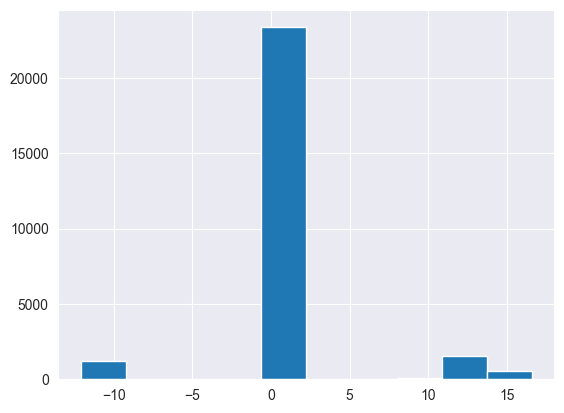

Text(0.5, 1.0, 'Distribution of net_investment_log')

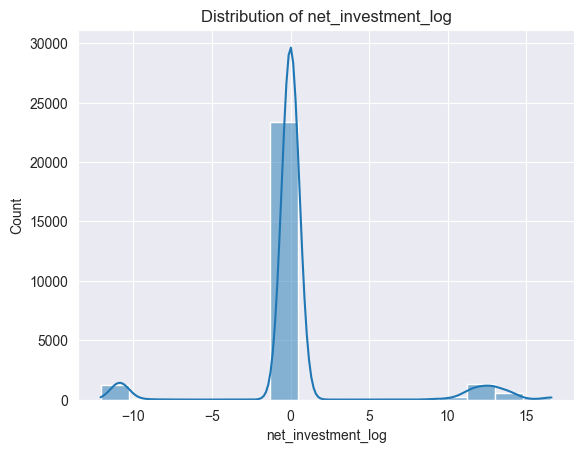

In [168]:
train['log_gain'] = np.log2(train['Investment_Gain'] + 1)
train['log_loss'] = np.log2(train['Investment_Loss'] + 1)
train['net_investment_log'] = train['log_gain'] - train['log_loss']

plt.hist(train['net_investment_log'])
plt.show()

sns.histplot(train['net_investment_log'].dropna(), kde=True)
plt.title(f"Distribution of net_investment_log")

In [169]:
train["A_log"] = np.log1p(train["A"])

In [170]:
# List of numeric features we care about
features = [
    "net_investment_log",
    "Weekly_Work_Hours",
    "Years_of_Education",
    "Age",
    "A_log",
    "D",
    "E",
    "Investment_Gain",
    "Investment_Loss"
]

# Compute the five‐number summary (min, Q1, median, Q3, max) for each feature
summary = train[features].quantile([0.00, 0.25, 0.50, 0.75, 1.00]).T
summary.columns = ["Min", "Q1", "Median", "Q3", "Max"]
summary_int = summary.round(0).astype(int)

print(summary_int)

                    Min   Q1  Median   Q3    Max
net_investment_log  -12    0       0    0     17
Weekly_Work_Hours     1   40      40   45     99
Years_of_Education    1    9      10   12     16
Age                  17   28      37   48     90
A_log                 9   12      12   12     14
D                    -2    4       5    6     11
E                    83  130     139  148    199
Investment_Gain       0    0       0    0  99999
Investment_Loss       0    0       0    0   4356


In [171]:
# Remove outliers from 'net_investment_log' using 3 standard deviations
mean_log = train["net_investment_log"].mean()
std_log  = train["net_investment_log"].std()
lower  = mean_log - 4 * std_log
upper  = mean_log + 4 * std_log
train = train[(train["net_investment_log"] >= lower) & (train["net_investment_log"] <= upper)]


mean_A = train["A_log"].mean()
std_A  = train["A_log"].std()
lower_A  = mean_A - 3 * std_A
upper_A  = mean_A + 3 * std_A
train = train[(train["A_log"] >= lower_A) & (train["A_log"] <= upper_A)]


# Keep only values between 1 and 9 for column 'D'
train = train[(train["D"] >= 0) & (train["D"] <= 9)]

In [172]:
# Compute 99th percentile
p99 = train["Weekly_Work_Hours"].quantile(0.99)

# Remove rows where Weekly_Work_Hours > 99th percentile
train = train[train["Weekly_Work_Hours"] <= p99]

# print new max for verification
print("New max after filtering:", train["Weekly_Work_Hours"].max())
print("99th percentile used as threshold:", p99)

New max after filtering: 80
99th percentile used as threshold: 80.0


In [173]:
train.shape

(26389, 25)

This cell defines helper functions to collapse rarely seen categories into broader groups, reducing cardinality for certain columns.
These functions prepare us to reduce the number of dummy columns later on when we one-hot encode.

In [174]:
# ------------ Grouping functions ------------

# Grouping Preferred_Communication_Method
def group_pref_com(pref):
    if pref == "Mail" or pref == "mail":
        return "Mail"
    if pref == "Email" or pref == "email":
        return "EMail"
    if pref == "Phone" or pref == "phone" or pref == "phone call":
        return "Phone"
    else:
        return "Other"

# Grouping Country_of_Residence
def group_country(country):
    if country == "United-States":
        return "USA"
    elif country == "Mexico":
        return "Mexico"
    else:
        return "Other"
    
# Grouping Education_Level
def group_education(edu):
    pre_school = ['Preschool']
    school = ['1st-4th', '5th-6th', '9th', '10th', '11th', '12th', '7th-8th']
    post_hs = ['HS-grad', 'Some-college']
    assoc = ['Assoc-voc', 'Assoc-acdm']
    higher = ['Masters', 'Bachelors']
    postgraduate = ['Doctorate', 'Prof-school']
    
    if edu in pre_school:
        return 'pre_school'
    elif edu in school:
        return 'school'
    elif edu in post_hs:
        return 'post_hs'
    elif edu in assoc:
        return 'assoc'
    elif edu in higher:
        return 'higher'
    elif edu in postgraduate:
        return 'postgraduate'
    else:
        return 'Other'
    
# Grouping Household_role
def group_household_role(role):
    if role in ['Husband', 'Wife']:
        return 'Spouse'
    else:
        return 'Other'

# Grouping Employment_Type
def group_employment(emp):
    if emp == 'Private':
        return 'Private'
    elif emp in ['Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'State-gov', 'Federal-gov']:
        return 'Not-Private'
    elif emp in ['Without-pay', 'Never-worked']:
        return 'Non-working'
    else:
        return 'Other'
    
# Grouping Ethnicity:
def group_ethnicity(eth):
    if eth == 'White':
        return 'White'
    elif eth == 'Black':
        return 'Black'
    else:
        return 'Other'
    
# 1. Mapping dictionary for Years_of_Education
edu_to_years = {
    'Preschool'    : 0,
    '1st-4th'      : (1 + 2 + 3 + 4) / 4,
    '5th-6th'      : 5.5,
    '7th-8th'      : 7.5,
    '9th'          : 9,
    '10th'         : 10,
    '11th'         : 11,
    '12th'         : 12,
    'HS-grad'      : 12,
    'Some-college' : (12 + 13 + 14 + 15) / 4,
    'Assoc-voc'    : 14,
    'Assoc-acdm'   : 14,
    'Bachelors'    : 16,
    'Masters'      : 18,
    'Prof-school'  : 19,
    'Doctorate'    : 20
}


def group_edu_years(X):
    # Ensure X is treated as a 2D array
    arr = X.to_numpy()
    
    if arr.ndim != 2 or arr.shape[1] != 2:
        raise ValueError("group_edu_years expects exactly 2 columns: [Years_of_Education, Education_Level]")
    
    # Now arr[:, 0] and arr[:, 1] work as intended
    raw_years   = pd.Series(arr[:, 0])
    raw_levels  = pd.Series(arr[:, 1])
    
    # Map Education_Level → numeric years
    mapped_years = raw_levels.map(edu_to_years)
    
    # Fill NaN in raw_years with mapped_years
    filled = raw_years.fillna(mapped_years)
    
    # Return a single-column DataFrame
    return filled.to_frame(name="Years_of_Education")

def group_job_type(job):
    # 1. White-collar
    white = {
        "Exec-managerial", 
        "Prof-specialty", 
        "Adm-clerical", 
        "Sales", 
        "Tech-support"
    }
    # 2. Blue-collar
    blue = {
        "Craft-repair",
        "Machine-op-inspct",
        "Transport-moving",
        "Handlers-cleaners",
        "Farming-fishing",
        "Protective-serv"
    }
    # 3. Service
    service = {
        "Other-service",
        "Priv-house-serv"
    }
    # 4. Military
    military = {"Armed-forces"}

    if job in white:
        return "White-collar"
    elif job in blue:
        return "Blue-collar"
    elif job in service:
        return "Service"
    elif job in military:
        return "Military"
    else:
        return "Other"


In this cell, we apply each grouping function to the raw columns and create new “_grouped” columns in both train and test.

In [175]:
from sklearn.preprocessing import FunctionTransformer
import pandas as pd

# 1. Single-column groupers: convert X (which may be a 1-col DataFrame or 2D array shape (n,1))
#    into a flat 1D array via X.to_numpy().ravel(), then map the scalar function.

pref_com_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_pref_com).to_frame("Preferred_Communication_Method"),
    validate=False
)

country_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_country).to_frame("Country_of_Residence"),
    validate=False
)

edu_level_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_education).to_frame("Education_Level_Mapped"),
    validate=False
)

house_hold_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_household_role).to_frame("Household_Role"),
    validate=False
)

emp_type_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_employment).to_frame("Employment_Type"),
    validate=False
)

ethnicity_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_ethnicity).to_frame("Ethnicity"),
    validate=False
)

job_type_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_job_type).to_frame("job_type"),
    validate=False
)

# 2. Two-column grouper: 
#    X will be shape (n_samples, 2), where column 0 = Years_of_Education,
#    column 1 = Education_Level. We need to call group_edu_years on each row.

edu_years_group = FunctionTransformer(
    func=lambda X: group_edu_years(X),
    validate=False
)

In [176]:
X_train.columns

Index(['customer_id', 'Age', 'Employment_Type', 'A', 'Education_Level',
       'Years_of_Education', 'Marital_Status', 'Job_Type', 'Household_Role',
       'Ethnicity', 'Gender', 'Investment_Gain', 'Investment_Loss',
       'Weekly_Work_Hours', 'Country_of_Residence',
       'Preferred_Communication_Method', 'D', 'E'],
      dtype='object')

In [177]:
# ------------ pipelines ------------

# Preferred_Communication_Method pipeline
pref_pipeline = Pipeline([
    ('group', pref_com_group),  
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Country_of_Residence pipeline
country_pipeline = Pipeline([
    ('group', country_group),
    ('impute', SimpleImputer(strategy='most_frequent')),  # or 'constant' if you prefer
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Education_Level pipeline
edu_pipeline = Pipeline([
    ('group', edu_level_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Employment_Type pipeline
employment_pipeline = Pipeline([
    ('group', emp_type_group),
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Ethnicity pipeline
ethnicity_pipeline = Pipeline([
    ('group', ethnicity_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Household pipeline
Household_pipeline = Pipeline([
    ('group', house_hold_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Household pipeline
job_type_pipeline = Pipeline([
    ('group', job_type_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Years of education pipeline
edu_years_pipeline = Pipeline([
    ('fill_years', edu_years_group),
    ('impute_years', SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler()), 
])


# columns without special adjustments:
categorical_col = ['Gender', 'Marital_Status', 'Job_Type', 'Employment_Type']
numerical_col = ['E']
skw_numerical_col = ['Age', 'Investment_Gain', 'Investment_Loss']

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for numerical features (mean imputation)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler()), 

])

# Pipeline for numerical features (median imputation) - for skewed columns
skw_numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()), 
])


# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('pref_communication',       pref_pipeline,         ['Preferred_Communication_Method']),
    ('country',    country_pipeline,      ['Country_of_Residence']),
    ('edu_level',  edu_pipeline,          ['Education_Level']),
    ('edu_years',  edu_years_pipeline,    ['Years_of_Education', 'Education_Level']),
    ('employment_type', employment_pipeline,   ['Employment_Type']),
    ('ethnicity',  ethnicity_pipeline,    ['Ethnicity']),
    ('job_type',  job_type_pipeline,    ['Job_Type']),
    ('household_role',  Household_pipeline,    ['Household_Role']),
    ('cat',  cat_pipeline,          ['Gender', 'Marital_Status']), # Other categorical columns
    ('num',  num_pipeline,          ['E', 'Log_Net_Investment']),                                                       # Simple numeric column
    ('skw_num',    skw_numerical_pipeline,['Age', 'Investment_Gain', 'Investment_Loss', 'Net_Investment'])                # Skewed numeric columns    
    ],
    remainder="passthrough"
    # All remaining columns that were not specified in transformer. These columns don't need any transformation. This subset of columns is concatenated with the output of the transformers.
)

## Feature Selection

In [157]:

df_raw = X_train.copy()

# Transform the data to get a NumPy array of size (n_samples, n_total_features)
preprocessor.fit(df_raw)
X_transformed = preprocessor.transform(df_raw)

# 2. Build a list of all columns explicitly listed in the transformer specs
listed_columns = []
for _, _, cols in preprocessor.transformers_:
    # 'cols' can be a list of column names or a slice object
    if isinstance(cols, (list, tuple, np.ndarray)):
        listed_columns.extend(list(cols))
    # If it were a slice or boolean mask, you’d handle that here.
    # In most typical uses, it's a list of strings.

listed_columns = set(listed_columns)  # deduplicate

# 3. Iterate again to collect output names for each transformer block
feature_names = []

for name, transformer, cols in preprocessor.transformers_:
    # a) If the transformer is explicitly "drop", skip it
    if transformer == "drop":
        continue

    # b) If the transformer is "passthrough", we'll handle it in step 4
    #    Actually, ColumnTransformer never lists "passthrough" here;
    #    remainder="passthrough" is handled separately.
    #    So we can ignore that case in this loop.

    # c) Figure out the “final” estimator within this transformer
    if isinstance(transformer, Pipeline):
        final_step = transformer.steps[-1][1]
    else:
        final_step = transformer

    # d) If the final step has get_feature_names_out, call it
    if hasattr(final_step, "get_feature_names_out"):
        try:
            names_out = final_step.get_feature_names_out(cols)
        except Exception:
            # If it errors (e.g. SimpleImputer in older sklearn), fallback:
            names_out = list(cols)  # one‐to‐one with input column(s)
    else:
        # If no get_feature_names_out, assume it returned exactly one column per input
        names_out = list(cols)

    feature_names.extend(names_out)

# The feature_names list contains integer indices for passthrough columns.
# We need to replace those integers with the actual column names from df_raw.

fixed_feature_names = []
for name in feature_names:
    if isinstance(name, int):
        # look up the real column name by positional index
        fixed_feature_names.append(df_raw.columns[name])
    else:
        fixed_feature_names.append(name)
fixed_feature_names.remove("Education_Level")       # Appears twice because of the education mapping
        


# 6. Build a DataFrame 
processed_df = pd.DataFrame(
    X_transformed, 
    columns=fixed_feature_names, 
    index=df_raw.index
)

processed_df.head()

,Preferred_Communication_Method_EMail,Preferred_Communication_Method_Mail,Preferred_Communication_Method_Other,Preferred_Communication_Method_Phone,Country_of_Residence_Mexico,Country_of_Residence_Other,Country_of_Residence_USA,Education_Level_assoc,Education_Level_higher,Education_Level_post_hs,...,E,Age,Investment_Gain,Investment_Loss,customer_id,A,Weekly_Work_Hours,D,Net_Investment,Log_Net_Investment
336,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.401146e+00,-0.338856,-0.142953,4.724848,116293.0,189759.0,45.0,3.901100,-1977.0,-10.949827
25716,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.238649e-01,0.322260,-0.142953,-0.213855,146164.0,323713.0,40.0,7.323579,0.0,0.000000
21766,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.198324e-15,0.101888,-0.142953,-0.213855,141506.0,119225.0,40.0,3.653778,0.0,0.000000
4614,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.259913e-01,-0.118484,-0.142953,-0.213855,121327.0,349116.0,44.0,4.263327,0.0,0.000000
9414,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-6.898521e-01,1.497579,-0.142953,-0.213855,126985.0,75867.0,60.0,3.914996,0.0,0.000000


In [162]:
#processed_df.head()
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22140 entries, 336 to 8261
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Preferred_Communication_Method_EMail  22140 non-null  float64
 1   Preferred_Communication_Method_Mail   22140 non-null  float64
 2   Preferred_Communication_Method_Other  22140 non-null  float64
 3   Preferred_Communication_Method_Phone  22140 non-null  float64
 4   Country_of_Residence_Mexico           22140 non-null  float64
 5   Country_of_Residence_Other            22140 non-null  float64
 6   Country_of_Residence_USA              22140 non-null  float64
 7   Education_Level_assoc                 22140 non-null  float64
 8   Education_Level_higher                22140 non-null  float64
 9   Education_Level_post_hs               22140 non-null  float64
 10  Education_Level_postgraduate          22140 non-null  float64
 11  Education_Level_pre

In [ ]:
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

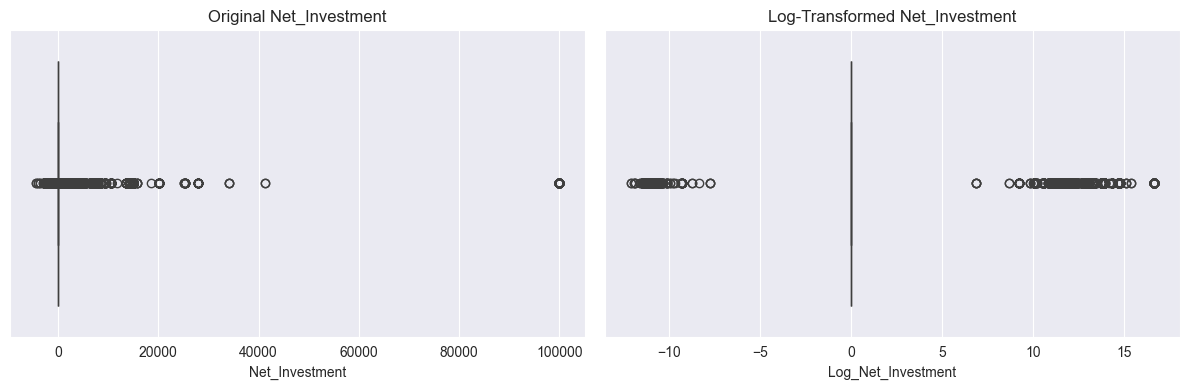

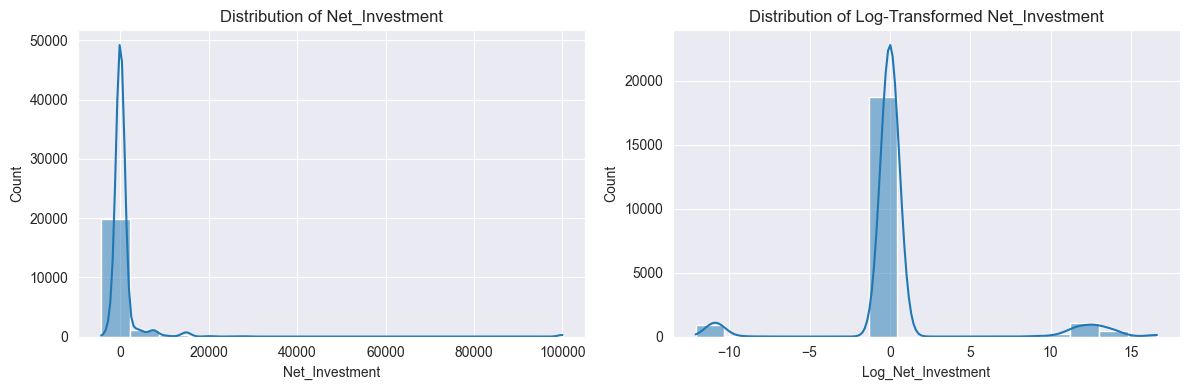

In [178]:
#Doing a log transformation while still distinguishing losses vs. gains.
X_train['Net_Investment'] = X_train['Investment_Gain'] - X_train['Investment_Loss']
X_test['Net_Investment'] = X_test['Investment_Gain'] - test['Investment_Loss']

X_train['Log_Net_Investment'] = np.sign(X_train['Net_Investment']) * np.log2(abs(X_train['Net_Investment']) + 1)
X_test['Log_Net_Investment'] = np.sign(X_test['Net_Investment']) * np.log2(abs(X_test['Net_Investment']) + 1)


# Side-by-side boxplots 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=X_train['Net_Investment'], ax=axes[0])
axes[0].set_title('Original Net_Investment')
axes[0].set_xlabel('Net_Investment')

sns.boxplot(x=X_train['Log_Net_Investment'], ax=axes[1])
axes[1].set_title('Log-Transformed Net_Investment')
axes[1].set_xlabel('Log_Net_Investment')

plt.tight_layout()
plt.show()

# Side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(X_train['Net_Investment'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Net_Investment')
axes[0].set_xlabel('Net_Investment')

sns.histplot(X_train['Log_Net_Investment'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Log-Transformed Net_Investment')
axes[1].set_xlabel('Log_Net_Investment')

plt.tight_layout()
plt.show()

We applied a log transformation to Net_Investment to reduce skew and compress extreme outliers.
The resulting distribution is more symmetric, so we will keep it.


We applied a log transformation to column A to reduce skew and potentially improve its relationship with the target.
However, the correlation with Loan_Approval remained low, so we won't use it.

In [104]:
#BRING BACK AFTER!!!! AFTER PIPELINES TO CHECK THE FEATURE SELECTION!!!


'''
numeric_df = processed_df.select_dtypes(include="number")

# 2) Select all numeric columns (which now includes features + the target):
numeric_df = processed_df.select_dtypes(include="number")

# 3) Compute Pearson correlations against Loan_Approval:
corrs = numeric_df.corr()["Loan_Approval"].sort_values(ascending=False)
print(corrs)
'''

'\nnumeric_df = processed_df.select_dtypes(include="number")\n\n# 2) Select all numeric columns (which now includes features + the target):\nnumeric_df = processed_df.select_dtypes(include="number")\n\n# 3) Compute Pearson correlations against Loan_Approval:\ncorrs = numeric_df.corr()["Loan_Approval"].sort_values(ascending=False)\nprint(corrs)\n'

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

Creating boolean masks to understand if the data is missed randomly or not.

In [105]:
#TAMAR - FIX AFTER
# 1. Create a boolean mask for missingness - job type
mask_Job_Type = X_train['Job_Type'].isna()            # True where missing
train['MissingFlag_Job_Type'] = mask_Job_Type.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Log_Net_Investment']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'Net_Investment', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Job_Type')[numeric_cols].describe().unstack(1))

# bring back after - just sick of the big graphs.
# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', ]
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Job_Type'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()

In [108]:



# 1. Create a boolean mask for missingness with Investment_Gain to see if we can delete it to use YJ
mask_Investment_Gain = X_train['Investment_Gain'].isna()            # True where missing
X_train['MissingFlag_Investment_Gain'] = mask_Investment_Gain.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['E']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Investment_Gain')[numeric_cols].describe().unstack(1))


''' bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', ]
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Investment_Gain'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

In [ ]:
# 1. Create a boolean mask for missingness with Ethnicity
mask_Ethnicity = train['Ethnicity'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['D']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

In [ ]:
# 1. Create a boolean mask for missingness with Ethnicity
mask_Ethnicity = train['Preferred_Communication_Method'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Weekly_Work_Hours']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

In [ ]:
# 1. Create a boolean mask for Job type with Ethnicity
mask_Ethnicity = train['Job_Type'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Weekly_Work_Hours']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

In [ ]:
# 1. Create a boolean mask for missingness with Ethnicity
mask_Ethnicity = train['Employment_Type'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Weekly_Work_Hours']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

Based on our initial EDA (where we plotted boxplots and histograms in Part 1), we selected seven features—`net_investment_log`, `Weekly_Work_Hours`, `Years_of_Education`, `Age`, `A`, `D`, and `E`—for outlier removal. First, we computed and displayed the five-number summary (Min, Q1, Median, Q3, Max) for each to see which values lay far outside the interquartile range. For `net_investment_log`, we then calculated its mean and standard deviation and removed any rows whose values fell beyond ± 4 σ; this eliminates only about 800 observations (≈ 3 % of the data), preserving most valid high-net-worth cases. For the anonymous columns A and E, we used the IQR rule and deleted any rows outside \[Q1 − 1.5·IQR, Q3 + 1.5·IQR]. Feature D  which had a narrow IQR was trimmed for any value outside \[1, 9] (its 1.5·IQR boundaries) was removed. Since `Age` and `Years_of_Education` fell entirely within reasonable IQR bounds, we left them intact. Finally, because some applicants truly work long hours, we decided to remove (rather than cap) only those `Weekly_Work_Hours` values above the 99th percentile, ensuring that genuine 60–80-hour workweeks remain in the data while the most extreme outliers are excluded.

## 4. Feature Selection


In [151]:
# Using RFECV to check the optimal number of explanatory variables
rfecv = RFECV(
        estimator=LogisticRegression(
        penalty='l2',    # ridge penalty
        C=1,           # try 0.1 (you can grid‐search this)
        solver='liblinear',
        max_iter=2000
    ),
    step=1,
    cv=StratifiedKFold(5),
    scoring='roc_auc',
    min_features_to_select=5,
    n_jobs=-1
)

# Build the feature selection pipeline
pipeline = Pipeline([
    ('feature_sel', rfecv),
    ('clf',             LogisticRegression(
        penalty='l2',    # ridge penalty
        C=0.1,           # try 0.1 (you can grid‐search this)
        solver='liblinear',
        max_iter=2000
    ))
])

# Fit it
pipeline.fit(X1, y1)

mask = pipeline.named_steps['feature_sel'].support_
selected_columns = X1.columns[mask]
print("Selected features:", list(selected_columns))



KeyboardInterrupt: 

In [65]:
# Using RFECV to check the optimal number of explanatory variables
rfecv = RFECV(
        estimator=LogisticRegression(
        penalty='l2',    # ridge penalty
        C=0.0001,           # try 0.1 (you can grid‐search this)
        solver='liblinear',
        max_iter=2000
    ),
    step=1,
    cv=StratifiedKFold(5),
    scoring='roc_auc',
    min_features_to_select=5,
    n_jobs=-1
)

# Build the feature selection pipeline
pipeline = Pipeline([
    ('feature_sel', rfecv),
    ('clf',             LogisticRegression(
        penalty='l2',    # ridge penalty
        C=0.0001,           # try 0.1 (you can grid‐search this)
        solver='liblinear',
        max_iter=2000
    ))
])

# Fit it
pipeline.fit(X1, y1)

mask = pipeline.named_steps['feature_sel'].support_
selected_columns = X1.columns[mask]
print("Selected features:", list(selected_columns))


Selected features: ['Education_Level_higher', 'Education_Level_post_hs', 'Education_Level_school', 'Years_of_Education', 'Job_Type_Blue-collar', 'Job_Type_Service', 'Job_Type_White-collar', 'Household_Role_Other', 'Household_Role_Spouse', 'Gender_Female', 'Gender_Male', 'Marital_Status_Divorced', 'Marital_Status_Married-civ-spouse', 'Marital_Status_Never-married', 'E', 'Age', 'Investment_Gain', 'Investment_Loss', 'D', 'log_gain', 'log_loss', 'A_log']


In [179]:
# Using RFECV to check the optimal number of explanatory variables
rfecv = RFECV(
        estimator=LogisticRegression(
        penalty='l2',    # ridge penalty
        C=0.001,           
        solver='liblinear',
        max_iter=2000
    ),
    step=1,
    cv=StratifiedKFold(5),
    scoring='roc_auc',
    min_features_to_select=5,
    n_jobs=-1
)

'''
# Build the feature selection pipeline
pipeline = Pipeline([
    ('feature_sel', rfecv),
    ('clf',             LogisticRegression(
        penalty='l2',    # ridge penalty
        C=0.001,           # try 0.1 (you can grid‐search this)
        solver='liblinear',
        max_iter=2000
    ))
])

# Fit it
pipeline.fit(X1, y1)

mask = pipeline.named_steps['feature_sel'].support_
selected_columns = X1.columns[mask]
print("Selected features:", list(selected_columns))
'''

'\n# Build the feature selection pipeline\npipeline = Pipeline([\n    (\'feature_sel\', rfecv),\n    (\'clf\',             LogisticRegression(\n        penalty=\'l2\',    # ridge penalty\n        C=0.001,           # try 0.1 (you can grid‐search this)\n        solver=\'liblinear\',\n        max_iter=2000\n    ))\n])\n\n# Fit it\npipeline.fit(X1, y1)\n\nmask = pipeline.named_steps[\'feature_sel\'].support_\nselected_columns = X1.columns[mask]\nprint("Selected features:", list(selected_columns))\n'

In [31]:
# Subset your DataFrame to the selected columns:
X_selected = X1[selected_features]

X_selected.head()


train_selected = train[selected_features]
test_selected = test[selected_features]

,Country_of_Residence_Mexico,Years_of_Education,Household_Role_Other,Marital_Status_Divorced,Marital_Status_Married-spouse-absent,Marital_Status_Never-married,Marital_Status_Separated,Marital_Status_Widowed,Job_Type_Exec-managerial,Job_Type_Farming-fishing,Job_Type_Handlers-cleaners,Job_Type_Machine-op-inspct,Job_Type_Other-service,Job_Type_Priv-house-serv,Job_Type_Prof-specialty,Job_Type_Protective-serv,Job_Type_Tech-support,Employment_Type_Federal-gov,Employment_Type_Self-emp-inc,Investment_Gain
0,0.0,-0.440049,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.145838
1,0.0,-0.440049,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.145838
2,0.0,-2.362161,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.145838
3,0.0,-0.055626,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.145838
5,0.0,-1.593316,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.145838


## 4. Model Training – Basic Models
_Start simple. Train Logistic Regression or KNN._

In [110]:
X_train.head()

,customer_id,Age,Employment_Type,A,Education_Level,Years_of_Education,Marital_Status,Job_Type,Household_Role,Ethnicity,...,Weekly_Work_Hours,Country_of_Residence,C,Preferred_Communication_Method,D,B,E,Net_Investment,Log_Net_Investment,MissingFlag_Investment_Gain
336,116293,34.0,Private,189759,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,...,45,United-States,116.950503,mail,3.901100,NaN,157.340604,-1977.0,-10.949827,Present
25716,146164,43.0,Private,323713,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,...,40,United-States,99.439067,Phone,7.323579,NaN,140.826881,0.0,0.000000,Present
21766,141506,40.0,Private,119225,Assoc-voc,11.0,Married-civ-spouse,Prof-specialty,Husband,White,...,40,United-States,88.475484,Mail,3.653778,NaN,NaN,0.0,0.000000,Present
4614,121327,37.0,Private,349116,HS-grad,9.0,Never-married,Sales,Not-in-family,Black,...,44,United-States,103.039378,Mail,4.263327,NaN,142.147254,0.0,0.000000,Present
9414,126985,59.0,Private,75867,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,...,60,United-States,84.005408,Phone_Call,3.914996,NaN,130.306489,0.0,0.000000,Present


In [130]:
X_train.columns

Index(['customer_id', 'Age', 'Employment_Type', 'A', 'Education_Level',
       'Years_of_Education', 'Marital_Status', 'Job_Type', 'Household_Role',
       'Ethnicity', 'Gender', 'Investment_Gain', 'Investment_Loss',
       'Weekly_Work_Hours', 'Country_of_Residence',
       'Preferred_Communication_Method', 'D', 'E', 'Net_Investment',
       'Log_Net_Investment'],
      dtype='object')

In [181]:
pipeline = Pipeline([
    ('preproc',     preprocessor),    # 1. Impute, encode, scale, etc.
    ('feature_sel', rfecv),           # 2. RFECV (or any selector)
    ('clf',         LogisticRegression(
                        penalty='l2',
                        solver='liblinear',
                        max_iter=1000
                    ))             # 3. Your final model
])

# 3. Cross‐validate on the TRAINING set
#    (CV will fit a fresh copy of `pipeline` on each fold)
cv_scores = cross_val_score(
    pipeline,
    X_train, y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    error_score='raise'       # ← will re-raise the first error it sees
)
print(f"CV ROC-AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")







# 4. Fit the pipeline on ALL the training data
pipeline.fit(X_train, y_train)

# 5. Evaluate on your hold-out TEST set
y_pred  = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Test   ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))


AttributeError: 'LogisticRegression' object has no attribute 'classes_'

In [182]:
# 1) Cross-validate (this does *not* mutate `pipeline`)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(
    pipeline,
    X_train, y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
print(f"CV ROC-AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# 2) Now *fit* your original pipeline on all the training data
pipeline.fit(X_train, y_train)

# 3) You can now predict, get probabilities, or inspect .classes_
y_pred  = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]
print("Classes seen in training:", pipeline.named_steps['clf'].classes_)


c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "c:\use

CV ROC-AUC: nan ± nan
Classes seen in training: [0 1]


## 5. Model Training – Advanced Models
Choose 3 models from:
- Decision Tree
- Random Forest or AdaBoost
- Support Vector Machine
- Multi-Layer Perceptron (Neural Net)

_Include basic hyperparameter tuning or explain defaults._

## 6. Evaluation
- Build confusion matrix for at least one model
- Generate ROC curves (using K-Fold CV)
- Report AUC

**✏️ Answer in markdown:**
- Does any model overfit?
- Which model generalizes best?
- Final choice justification

## 7. Final Prediction on Test Set
_Predict probabilities (not binary labels!) and create submission file._

In [ ]:
# Example:
# final_model.predict_proba(test)[:, 1]  # ← probability of 'approved'
# submission = pd.DataFrame({
#     'customer_id': test['customer_id'],
#     'loan_approval': predictions
# })
# submission.to_csv('Submission_group_32.csv', index=False)

## 8. Appendix / Extra Notes
_Use this area for extra analysis, failed attempts, or ideas you explored._

We tried to handle the missing values with linear regression, but R^2 was 0.02, so we just impute with the median.
Trying:

In [94]:
######## TRY AGAIN AFTER ADDING AGE
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

df = train  

# 1. Define features & split known vs missing
features = ['Weekly_Work_Hours', 'Years_of_Education', 'Age']
known   = df[df['Investment_Gain'].notnull() ].copy()
missing = df[df['Investment_Gain'].isnull()].copy()

X_known = known[features]
y_known = known['Investment_Gain']

# 2. Hold out 20% for validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_known, y_known,
    test_size=0.2,
    random_state=42
)

# 3. Train on the 80%
lr = LinearRegression()
lr.fit(X_tr, y_tr)

# 4. Predict on the hold‐out and evaluate
y_pred = lr.predict(X_val)
print(f"R² on hold-out: {r2_score(y_val, y_pred):.3f}")
print(f"MAE on hold-out: {mean_absolute_error(y_val, y_pred):.3f}")

# 5. (Optional) Retrain on ALL known data and impute missings
lr_full = LinearRegression()
lr_full.fit(X_known, y_known)

X_missing = missing[features]
df.loc[df['Investment_Gain'].isnull(), 'Investment_Gain'] = lr_full.predict(X_missing)
'''


'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import r2_score, mean_absolute_error\n\ndf = train  \n\n# 1. Define features & split known vs missing\nfeatures = [\'Weekly_Work_Hours\', \'Years_of_Education\', \'Age\']\nknown   = df[df[\'Investment_Gain\'].notnull() ].copy()\nmissing = df[df[\'Investment_Gain\'].isnull()].copy()\n\nX_known = known[features]\ny_known = known[\'Investment_Gain\']\n\n# 2. Hold out 20% for validation\nX_tr, X_val, y_tr, y_val = train_test_split(\n    X_known, y_known,\n    test_size=0.2,\n    random_state=42\n)\n\n# 3. Train on the 80%\nlr = LinearRegression()\nlr.fit(X_tr, y_tr)\n\n# 4. Predict on the hold‐out and evaluate\ny_pred = lr.predict(X_val)\nprint(f"R² on hold-out: {r2_score(y_val, y_pred):.3f}")\nprint(f"MAE on hold-out: {mean_absolute_error(y_val, y_pred):.3f}")\n\n# 5. (Optional) Retrain on ALL known data and impute missings\nlr_full = LinearRegression()\nlr_full